In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data (replace 'your_data.csv' with the actual path to your dataset)
df = pd.read_csv('genres_v2.csv')

# Display the first few rows of the dataframe
df.head()

/var/folders/cc/c2h4hf8x1rq2d8qclpl8dwdw0000gn/T/ipykernel_11529/573428230.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('genres_v2.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [4]:
df_unique_songs = df.drop_duplicates(subset='song_name', keep='first')

# Normalize the feature values using Min-Max Scaler
scaler = MinMaxScaler()
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'key']
df_scaled = pd.DataFrame(scaler.fit_transform(df_unique_songs[features]), 
                         index=df_unique_songs.index, 
                         columns=features)


In [5]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(df_scaled)

# Display the cosine similarity matrix
cos_sim_df = pd.DataFrame(cosine_sim)
cos_sim_df.head()


,0,1,2,3,4,5,6,7,8,9,...,15430,15431,15432,15433,15434,15435,15436,15437,15438,15439
0,1.000000,0.829662,0.904532,0.920653,0.972281,0.960562,0.879198,0.919345,0.948410,0.875202,...,0.855516,0.934141,0.845220,0.944051,0.920575,0.914389,0.974207,0.886690,0.945313,0.954820
1,0.829662,1.000000,0.860029,0.751646,0.846237,0.770956,0.955558,0.946566,0.798226,0.902703,...,0.902645,0.763753,0.908270,0.882445,0.820220,0.857538,0.769710,0.894194,0.893720,0.830690
2,0.904532,0.860029,1.000000,0.935407,0.871947,0.888716,0.925808,0.917562,0.954494,0.931877,...,0.909207,0.876628,0.818071,0.938714,0.865599,0.895438,0.900480,0.849887,0.921665,0.889877
3,0.920653,0.751646,0.935407,1.000000,0.885319,0.903577,0.830644,0.845586,0.979667,0.804996,...,0.785136,0.901641,0.749913,0.895986,0.858121,0.861411,0.951163,0.825115,0.872907,0.914737
4,0.972281,0.846237,0.871947,0.885319,1.000000,0.913366,0.845629,0.902872,0.916265,0.868268,...,0.858581,0.973841,0.900118,0.950231,0.964590,0.922324,0.926278,0.913558,0.945174,0.981622


In [6]:
def recommend_songs(song_name, songs_df, cosine_sim_matrix, num_of_songs=15):
    # Check if the song exists in the dataframe
    if song_name not in songs_df['song_name'].values:
        print(f"The song '{song_name}' does not exist in the dataset. Please check for typos or use a different song.")
        return []

    # Find the index of the song that matches the song_name
    song_index = songs_df.index[songs_df['song_name'] == song_name].tolist()[0]
    sim_scores = list(enumerate(cosine_sim_matrix[song_index]))
    
    # Sort the songs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Skip the first element if it is the song itself (similarity = 1)
    if sim_scores[0][1] == 1.0:
        sim_scores = sim_scores[1:num_of_songs+1]
    else:
        sim_scores = sim_scores[:num_of_songs]

    # Get the song indices and similarity scores
    song_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]
    
    # Fetch the song names using the indices
    recommended_songs = songs_df.iloc[song_indices]
    
    # Create a list of tuples with the song name and similarity score
    recommendations = [(songs_df.iloc[i]['song_name'], similarity_scores[idx]) for idx, i in enumerate(song_indices)]
    
    return recommendations

In [7]:
def recommend_diverse_songs(songs_df, song_name, cosine_sim_matrix, num_of_songs=6, diversity_threshold=0.7):

    if song_name not in songs_df['song_name'].values:
        print(f"The song '{song_name}' does not exist in the dataset. Please check for typos or use a different song.")
        return []

    # Find the index of the song that matches the song_name
    song_index = songs_df.index[songs_df['song_name'] == song_name].tolist()[0]
    # Get similarity scores for the input song
    sim_scores = cosine_sim_matrix[song_index]
    
    # Get indices of songs sorted by similarity score
    sorted_indices = np.argsort(sim_scores)[::-1]
    
    # Start with the most similar song
    recommended_indices = [sorted_indices[0]]
    
    # Now loop over the sorted list and add only those songs that introduce more diversity
    for index in sorted_indices[1:]:
        # Skip if this song is too similar to any of the songs we've already added
        if all(cosine_sim_matrix[index, already_rec] < diversity_threshold for already_rec in recommended_indices):
            recommended_indices.append(index)
        if len(recommended_indices) >= num_of_songs:
            break
    
    # Get the song indices
    return recommended_indices

In [8]:
from pandas.plotting import parallel_coordinates

def plot_feature_comparison(input_song_name, recommended_songs, features_df):
    # Create a DataFrame containing features of the input song and the recommended songs
    comparison_df = features_df.loc[features_df['song_name'].isin(recommended_songs + [input_song_name])]
    
    # Add a new column to distinguish the input song from the recommended ones
    comparison_df['Type'] = ['Input Song' if name == input_song_name else 'Recommended Song' for name in comparison_df['song_name']]
    
    # Move 'song_name' and 'Type' to be the first columns for clarity
    fixed_columns = ['song_name', 'Type'] + [col for col in comparison_df.columns if col not in ['song_name', 'Type']]
    comparison_df = comparison_df[fixed_columns]
    
    # Plotting
    plt.figure(figsize=(15, 8))
    parallel_coordinates(comparison_df, 'Type', cols=features_df.columns[1:], color=["#1f77b4", "#ff7f0e"])
    plt.title(f'Feature Comparison: Input Song vs. Recommended Songs')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

In [9]:
# Make sure to include the correct song name you wish to test
song_name_to_test = "XO Tour Llif3"  # replace with your song name

recommendations = recommend_songs(song_name_to_test, df_unique_songs, cosine_sim)
diverseRecommendations = recommend_diverse_songs(df_unique_songs, song_name_to_test, cosine_sim)
print('DIVERSIFIED APPROACH')
print("Based on the song:", song_name_to_test, ", the system recommends the following songs:")
for i in range(1,len(diverseRecommendations)): 
    print(df.iloc[diverseRecommendations[i]]['song_name'])

print()
print()

#if recommendations:
#    print("Based on the song:", song_name_to_test, ", the system recommends the following songs:")
#    for rec in recommendations:
#        song_title, sim_score = rec
#        print(f"Song Name: {song_title}, Similarity Score: {sim_score:.2f}")
#else:
#    print("No recommendations found.")


if recommendations:
    print('MOST SIMILAR APPROACH')
    print("Based on the song:", song_name_to_test, ", the system recommends the following songs:")
    
    # Prepare the data for visualization
    song_titles = [rec[0] for rec in recommendations]
    similarity_scores = [rec[1] for rec in recommendations]
    
    # Create a dataframe for the recommended songs and similarity scores
    recommendations_df = pd.DataFrame({
        'Song Name': song_titles,
        'Similarity Score': similarity_scores
    })
    
    # Print the recommended songs with their similarity scores
    print(recommendations_df)
else:
    print("No recommendations found.")

DIVERSIFIED APPROACH
Based on the song: XO Tour Llif3 , the system recommends the following songs:
I Am Bulletproof
Spells
Winning
Osiris
Just Know


MOST SIMILAR APPROACH
Based on the song: XO Tour Llif3 , the system recommends the following songs:
                                           Song Name  Similarity Score
0                                           Caffeine          0.995809
1                                           Junkyard          0.992374
2                                  Does it real good          0.990343
3                                    Pineapple Skies          0.988792
4                                       Need Ya Body          0.987709
5                                        Auto Pistol          0.987542
6                                             PUPPET          0.987493
7                                            Track07          0.987131
8                                          Remission          0.986778
9                                       

In [10]:
# calculate intra-list similarity for recommendations of a song
def calculate_intra_list_similarity(recommendations):
    # Create a dataframe for the recommended songs and similarity scores
    recommendations_df = pd.DataFrame({
        'Song Name': [rec[0] for rec in recommendations],
        'Similarity Score': [rec[1] for rec in recommendations]
    })
    totalSimilarity = 0
    totalComparisons = 0
    for i in range(0, len(recommendations) - 1):
        for j in range(i + 1, len(recommendations)):
            # check cosine similarity matrix to calculate similarity between two songs
            song1 = recommendations[i][0]
            song2 = recommendations[j][0]
            song1_index = df_unique_songs.index[df_unique_songs['song_name'] == song1].tolist()
            song2_index = df_unique_songs.index[df_unique_songs['song_name'] == song2].tolist()
            if song1_index and song2_index and song1_index[0] < len(cosine_sim) and song2_index[0] < len(cosine_sim[song1_index[0]]):
                if (cosine_sim[song1_index[0]][song2_index[0]]):
                    totalSimilarity += cosine_sim[song1_index[0]][song2_index[0]]
                    totalComparisons += 1
    return totalSimilarity / totalComparisons if totalComparisons > 0 else 0
       

In [11]:
# calculate intra-list similarity for song recommendations
intraListSimilarity = calculate_intra_list_similarity(recommendations)
print("Intra-list similarity for song recommendations: ", intraListSimilarity)

# find recommendations for first 10 songs in the dataset and average their intra-list similarity scores
totalIntraListSimilarity = 0
for i in range(0, 10):
    recommendations = recommend_songs(df_unique_songs['song_name'][i], df_unique_songs, cosine_sim)
    currIntraListSimilarity = calculate_intra_list_similarity(recommendations)
    print("Intra-list similarity for song recommendations for song", df_unique_songs['song_name'][i], ":", currIntraListSimilarity)
    totalIntraListSimilarity += currIntraListSimilarity
print("Average intra-list similarity for first 10 songs in the dataset: ", totalIntraListSimilarity / 10)

Intra-list similarity for song recommendations:  0.8214426102366348
Intra-list similarity for song recommendations for song Mercury: Retrograde : 0.8622252013724344
Intra-list similarity for song recommendations for song Pathology : 0.881854659308537
Intra-list similarity for song recommendations for song Symbiote : 0.8557240950764813
Intra-list similarity for song recommendations for song ProductOfDrugs (Prod. The Virus and Antidote) : 0.8913657225915554
Intra-list similarity for song recommendations for song Venom : 0.8800638530204168
Intra-list similarity for song recommendations for song Gatteka : 0.8811799774869336
Intra-list similarity for song recommendations for song kamikaze (+ pulse) : 0.8792135706548841
Intra-list similarity for song recommendations for song T.R.U. (Totally Rotten Underground) : 0.8384035326345554
Intra-list similarity for song recommendations for song I Put My Dick in Your Mental : 0.8473071982778214
Intra-list similarity for song recommendations for song A

Intra-list similarity for song recommendations for song Mercury: Retrograde : 0.8622252013724344
Intra-list similarity for song recommendations for song Pathology : 0.881854659308537
Intra-list similarity for song recommendations for song Symbiote : 0.8557240950764813
Intra-list similarity for song recommendations for song ProductOfDrugs (Prod. The Virus and Antidote) : 0.8913657225915554
Intra-list similarity for song recommendations for song Venom : 0.8800638530204168
Intra-list similarity for song recommendations for song Gatteka : 0.8811799774869336
Intra-list similarity for song recommendations for song kamikaze (+ pulse) : 0.8792135706548841
Intra-list similarity for song recommendations for song T.R.U. (Totally Rotten Underground) : 0.8384035326345554
Intra-list similarity for song recommendations for song I Put My Dick in Your Mental : 0.8473071982778214
Intra-list similarity for song recommendations for song Andromeda : 0.8469154989463018
Intra-list similarity for song recomme

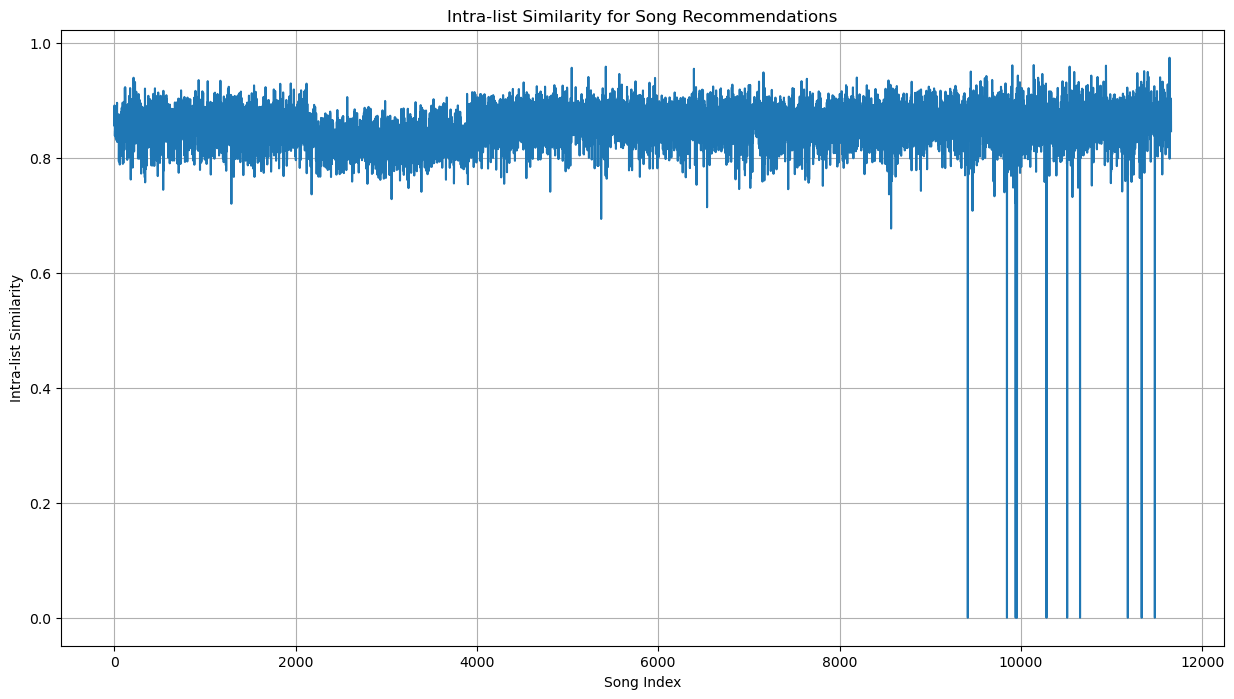

In [17]:
# calculate intra-list similarities for all songs in dataset and create visualization
intraListSimilarities = []
for i in range(0, len(df_unique_songs)):
    try:
        recommendations = recommend_songs(df_unique_songs['song_name'][i], df_unique_songs, cosine_sim)
        currIntraListSimilarity = calculate_intra_list_similarity(recommendations)
        intraListSimilarities.append(currIntraListSimilarity)
        print("Intra-list similarity for song recommendations for song", df_unique_songs['song_name'][i], ":", currIntraListSimilarity)
    except KeyError:
        print("Skipping song at index", i, "due to KeyError")

# create visualization for intra-list similarities
plt.figure(figsize=(15, 8))
plt.plot(intraListSimilarities)
plt.title('Intra-list Similarity for Song Recommendations')
plt.xlabel('Song Index')
plt.ylabel('Intra-list Similarity')
plt.grid(True)
plt.show()

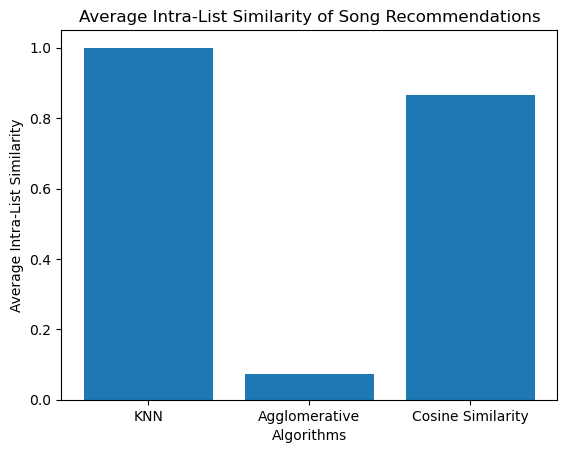

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Dummy data: replace with your actual algorithms and similarity calculations
algorithms = ['KNN', 'Agglomerative', 'Cosine Similarity']
intra_list_similarity = [0.9999995735656626, 0.07287909464866889, 0.8664253309369923]  # Replace with your calculated similarities

# Plotting
plt.bar(algorithms, intra_list_similarity)
plt.xlabel('Recommendation Algorithms')
plt.ylabel('Average Intra-List Similarity')
plt.title('Average Intra-List Similarity of Song Recommendations')
plt.show()